## Notizen
https://de.mathworks.com/help/signal/ug/measuring-signal-similarities.html

https://makeabilitylab.github.io/physcomp/signals/ComparingSignals/index.html

In [1]:
import numpy
from main import *
import os
import matplotlib.pyplot as plt
import IPython


ModuleNotFoundError: No module named 'main'

# Signale im Zeitbereich

File ..\viblib\v-09-10-7-36.wav exists.
File ..\viblib\test\2\v-09-10-7-36.wav exists.
10213 10197
Original um  16 samples gekürzt


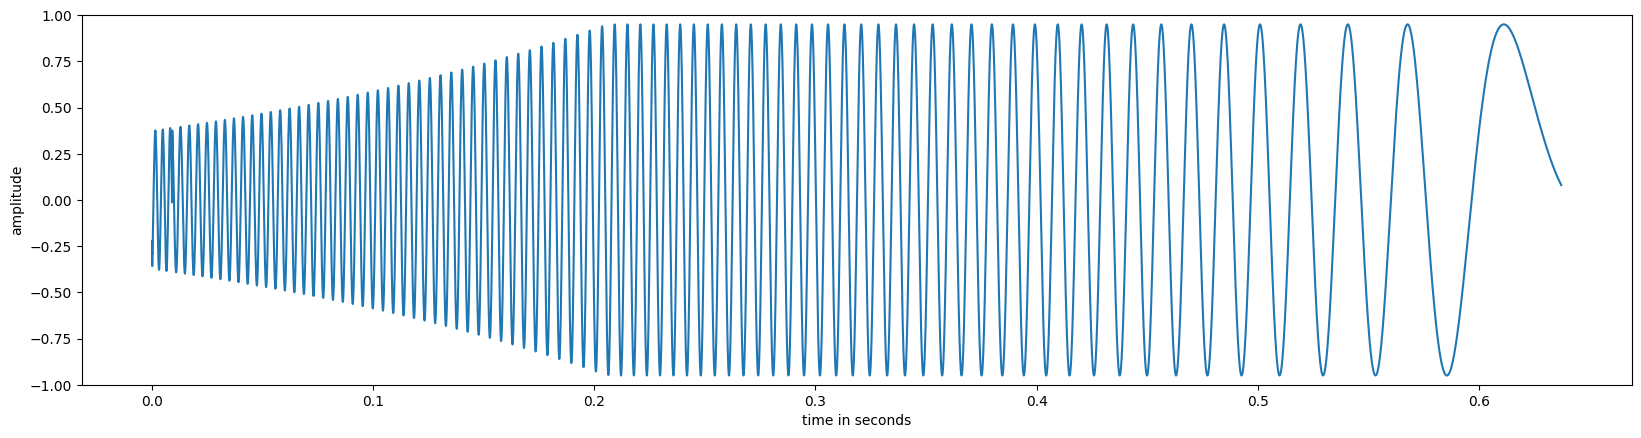

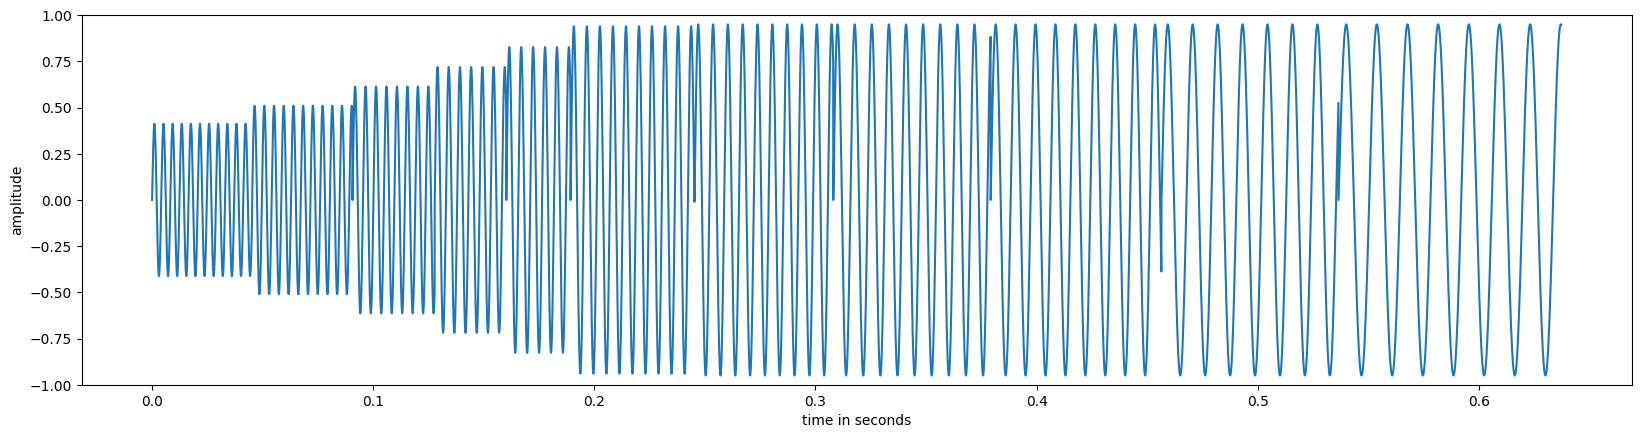

In [ ]:
name = "v-09-10-7-36"
originalFilePath = "..\\viblib\\" + name + ".wav"
convertedFilePath = "..\\viblib\\test\\2\\" + name + ".wav"



original, _=openFile(originalFilePath)
converted, sr=openFile(convertedFilePath)

print(len(original), len(converted))

if(len(original)> len(converted)):
    print("Original um ", len(original)-len(converted), "samples gekürzt")
    original = original[:len(converted)]

elif(len(original)< len(converted)):
    print("Converted um ", len(converted)-len(original), "samples gekürzt")
    converted = converted[:len(original)]


times = numpy.arange(0,len(original)/sr,1/sr)



plt.figure().set_figwidth(20)
plt.plot(times,original)
plt.xlabel("time in seconds")
plt.ylabel("amplitude")
plt.ylim([-1,1])



times = numpy.arange(0,len(converted)/sr,1/sr)
plt.figure().set_figwidth(20)
plt.xlabel("time in seconds")
plt.ylabel("amplitude")
plt.plot(times,converted)
plt.ylim([-1,1])
IPython.display.display(IPython.display.Audio(originalFilePath))
IPython.display.display(IPython.display.Audio(convertedFilePath))

# Vergleich der Frequenzen

Text(0.5, 1.0, 'converted')

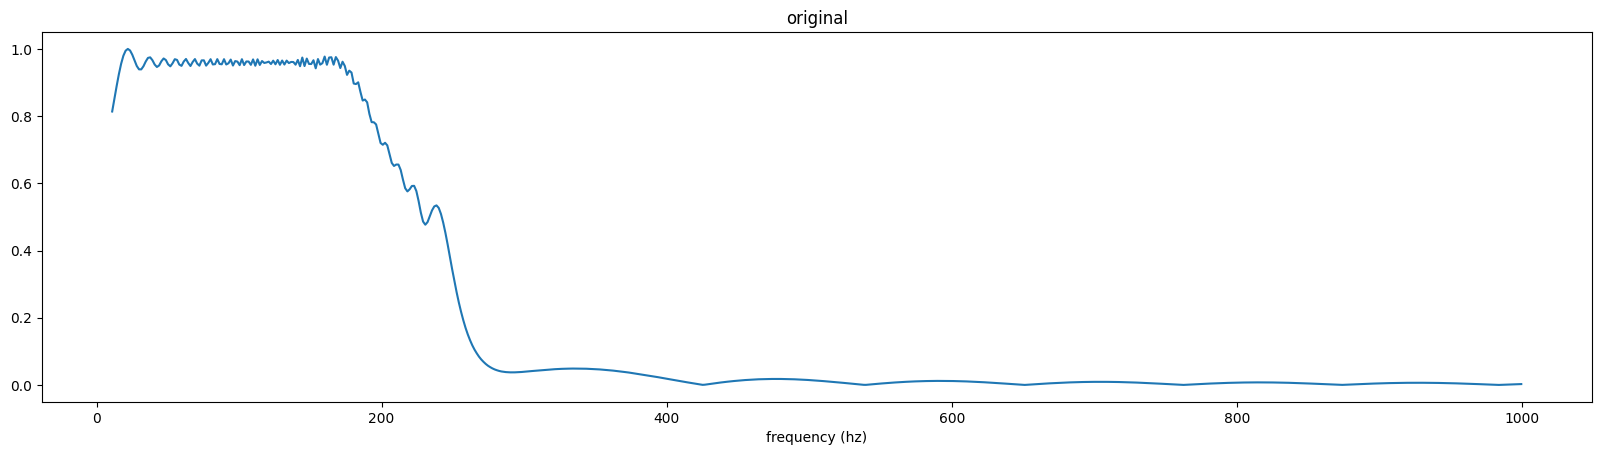

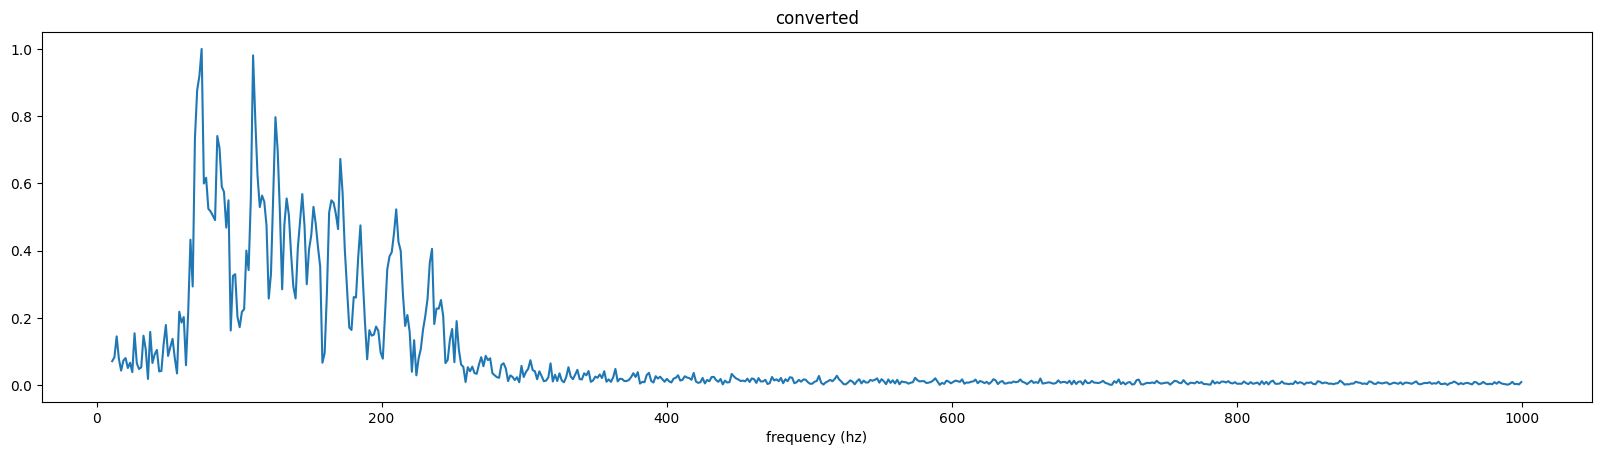

In [ ]:


import scipy.fft



original_fft=abs(scipy.fft.fft(original)) # Betrag des fft repräsentiert die Amplitude
converted_fft=abs(scipy.fft.fft(converted))

#Normalisieren
maxfft = max(original_fft)
original_fft = original_fft / maxfft
maxfft = max(converted_fft)
converted_fft = converted_fft/maxfft


frequencies = numpy.fft.fftfreq(n=len(original), d=1/sr)
original_fft = original_fft[:len(original_fft)//2]
original_fft = abs(original_fft)


converted_fft = converted_fft[:len(converted_fft)//2]
converted_fft = abs(converted_fft)

frequencies = frequencies[:len(frequencies)//2]

# 1000 alles über 1000 HZ weckschneiden (menschliche Wahrnemung von Frequenzen nur bis ca. 1000Hz)
index1000 = numpy.argmax(frequencies>1000)
original_fft = original_fft[:index1000]
converted_fft = converted_fft[:index1000]
frequencies = frequencies[:index1000]

index10 = numpy.argmax(frequencies>10)

plt.figure().set_figwidth(20)
#plt.xscale("log")
plt.plot(frequencies[index10:],original_fft[index10:])
plt.xlabel("frequency (hz)")
plt.title("original")
plt.figure().set_figwidth(20)
#plt.xscale("log")
plt.plot(frequencies[index10:],converted_fft[index10:])
plt.xlabel("frequency (hz)")
plt.title("converted")

## Standartabweichung der Frequenz (Gewichtete Standartabweichung)

In [ ]:
import numpy
import math

def var(values,weights):
    average = numpy.average(values, weights=weights)
    # Fast and numerically precise:
    variance = numpy.average((values-average)**2, weights=weights)
    return math.sqrt(variance)


print("Standartabweichung Originalsignal",var(frequencies,original_fft))
print("Standartabweichung konvertiertes Signal",var(frequencies,converted_fft))

print("Standartabweichung Varianz original",var(frequencies,mask*original_fft))
print("Standartabweichung Varianz konvertiert",var(frequencies,mask*converted_fft))

Standartabweichung Originalsignal 103.31535475736972
Standartabweichung konvertiertes Signal 144.83988144052856
Standartabweichung Varianz original 84.76188140412333
Standartabweichung Varianz konvertiert 99.89309181241757


## Abweichung der durchscnittlichen Frequenz

Text(0.5, 1.0, 'Error')

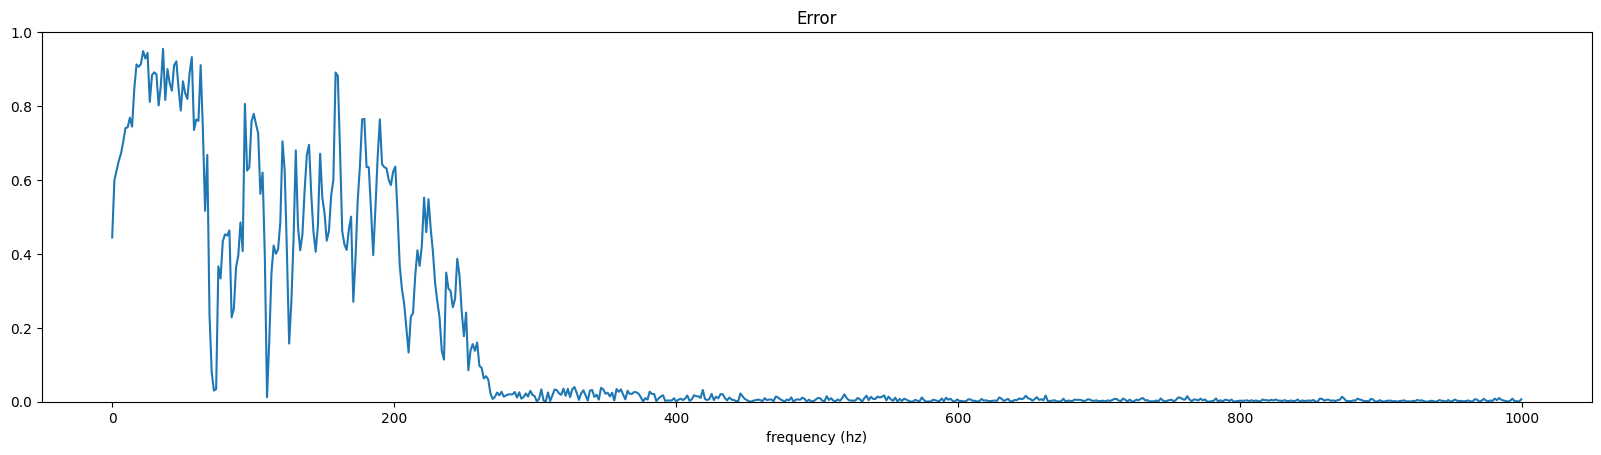

In [ ]:
Error = abs(original_fft-converted_fft)
plt.figure().set_figwidth(20)
plt.ylim([0, 1])
# plt.xscale("log")
plt.plot(frequencies,Error)
plt.xlabel("frequency (hz)")
plt.title("Error")

#Studien zeigen, dass die Wahrnehmung des Beschleuningungslevel bis ungefähr 200HZ ungefäht gleich bleibt und dann quadratisch abfällt: TODO in Berechnung der Durchschnittsfrequenz berücksichtigen


Original Durchschnitt: 125.49617787076758 Hz
Convertiert Durschchnitt: 152.40187402885078 Hz
Abweichung: 26.905696158083202 Hz
Durschschnittlicher Fehler 14.550606906414032 %
Durschschittlicher Fehler nach Maskierung 23.807910649134197 %


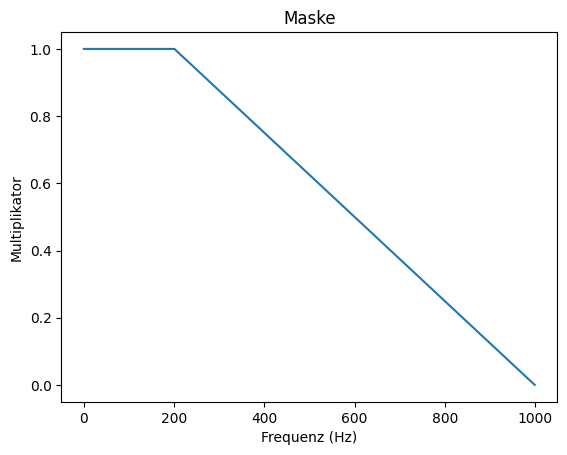

In [ ]:




index200 = numpy.argmax(frequencies>200)
step = 1/numpy.argmax(frequencies>1)

#bis 200hz bleibt die Wahrnehmung ungefähr gleich, dann wird sie schwächer
mask1=numpy.ones(len(frequencies[:index200]))
mask2=numpy.linspace(1,0,len(frequencies[index200:]))
mask=numpy.concatenate((mask1,mask2),axis=0)

plt.plot(frequencies,mask)
plt.title("Maske")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Multiplikator")

#frequenz mitteln
maskedfftOrg = numpy.multiply(original_fft,mask) 
original_mean = sum(numpy.multiply(frequencies, maskedfftOrg)) / sum(maskedfftOrg)
print("Original Durchschnitt:",original_mean, "Hz")

maskedFftConv= numpy.multiply(converted_fft, mask)
converted_mean = sum(numpy.multiply(frequencies, maskedFftConv)) / sum(maskedFftConv)
print("Convertiert Durschchnitt:", converted_mean, "Hz")

freqnce_diff = abs(original_mean - converted_mean)
print("Abweichung:", freqnce_diff, "Hz")





#mittlere Abweichung

meanDistance = numpy.mean(Error)
print("Durschschnittlicher Fehler", meanDistance*100, "%")
print("Durschschittlicher Fehler nach Maskierung", sum(numpy.multiply(Error,mask))/sum(mask) * 100, "%")

# (Amplituden) Leistung

Durschschnittliche Abweichung 1.9191166386008263 %


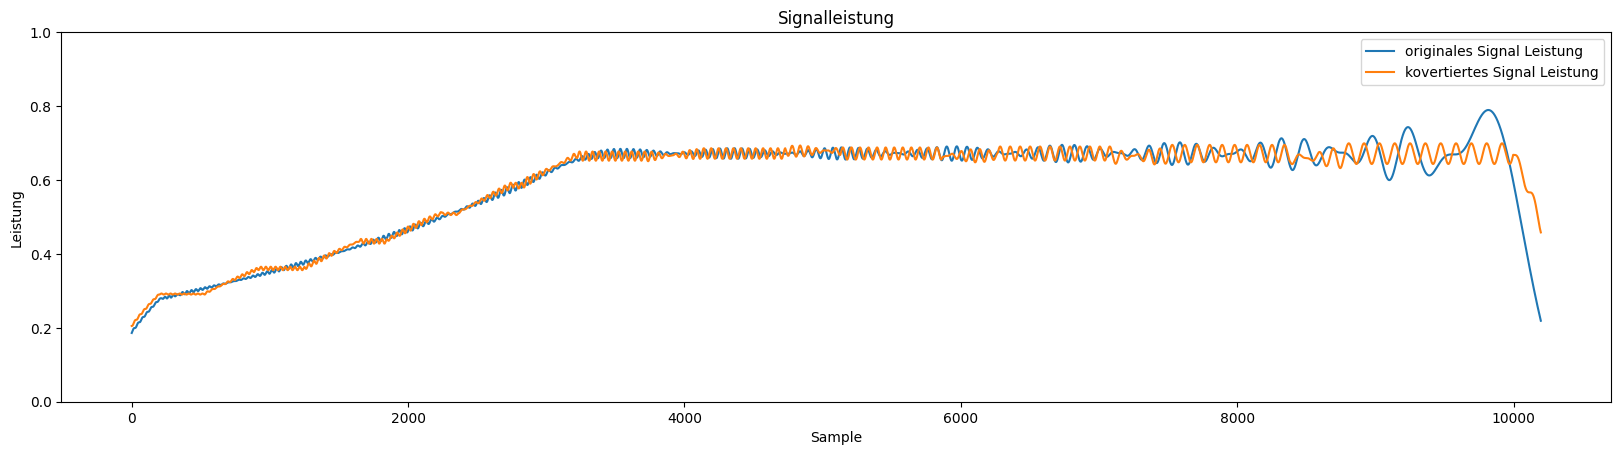

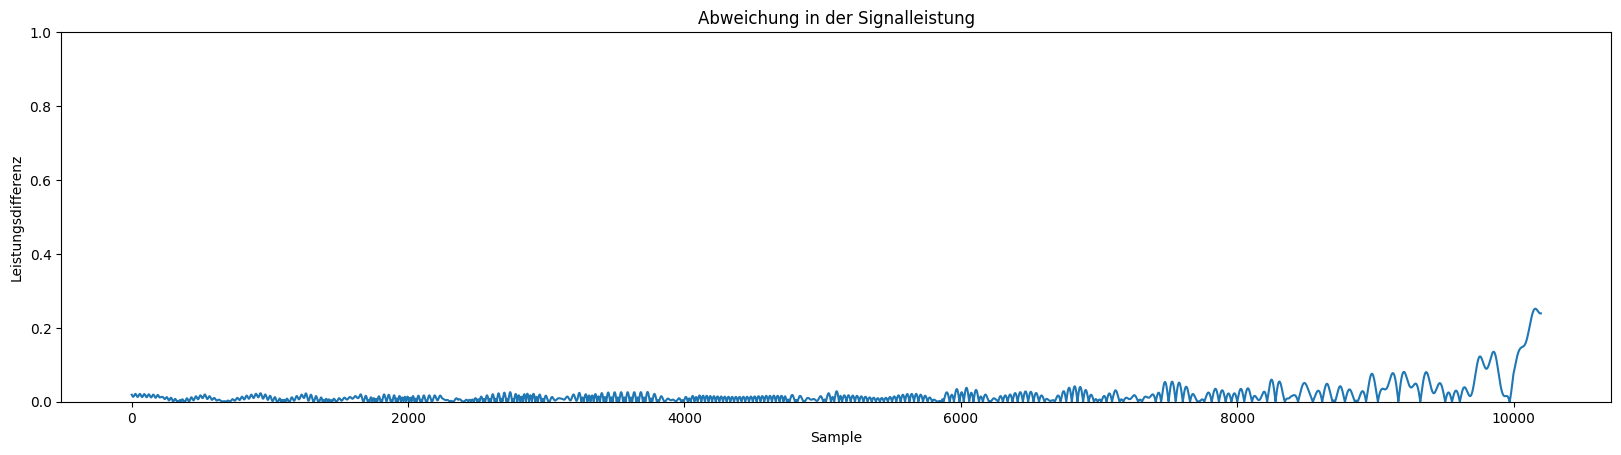

In [ ]:
from librosa.feature import rms


frame_length = sr//40


PlotInterminResults(False)
original_power = librosa.feature.rms(y=original,frame_length=frame_length, hop_length=1)
converted_power = librosa.feature.rms(y=converted,frame_length=frame_length, hop_length=1)

diff_power = [abs(op - cp) for op, cp in zip(original_power[0], converted_power[0])]

plt.figure().set_figwidth(20)
plt.title("Signalleistung")
plt.ylim(0,1)
plt.plot(original_power[0],label="originales Signal Leistung")
plt.plot(converted_power[0],label="kovertiertes Signal Leistung")
plt.legend()
plt.xlabel("Sample")
plt.ylabel("Leistung")

plt.figure().set_figwidth(20)
plt.title("Abweichung in der Signalleistung")
plt.ylim(0,1)
plt.plot(diff_power)
plt.xlabel("Sample")
plt.ylabel("Leistungsdifferenz")


meanDistance_power = numpy.mean(diff_power)

print("Durschschnittliche Abweichung", meanDistance_power*100, "%") 


## Varianz der Signalleistung

In [ ]:

print("Original",numpy.var(original_power[0]))
print("Konvertiert",numpy.var(converted_power[0]))

Original 0.018515404
Konvertiert 0.016596597


# Unterschied der Signalleistung

In [ ]:

ref_power = numpy.sum(original**2)/(sr/1000) #mW/L L - Faktor für Lautstärke 
inp_power = numpy.sum(converted**2)/(sr/1000) #mW/L L - Faktor für Lautstärke 
diff_power = abs(ref_power-inp_power)

print(diff_power)

1.3869476318359375


# Experimente

# Korrelation



In [ ]:
import librosa
import scipy.signal
signal_corr =scipy.signal.correlate(original,converted)
print("Zeitsignal Korrelation: ", signal_corr)

frequency_corr = scipy.signal.correlate(original_fft,converted_fft)
corr_test = numpy.correlate(original,original)
print(corr_test)

Zeitsignal Korrelation:  [-2.1115723e-01 -5.5019534e-01 -8.2279056e-01 ...  9.5703127e-03
  3.1860352e-03  2.4414063e-05]
[3761.379]


## Amplituden vergleich

Durchschnittliche Abweichung: 1.6257673038040727 %


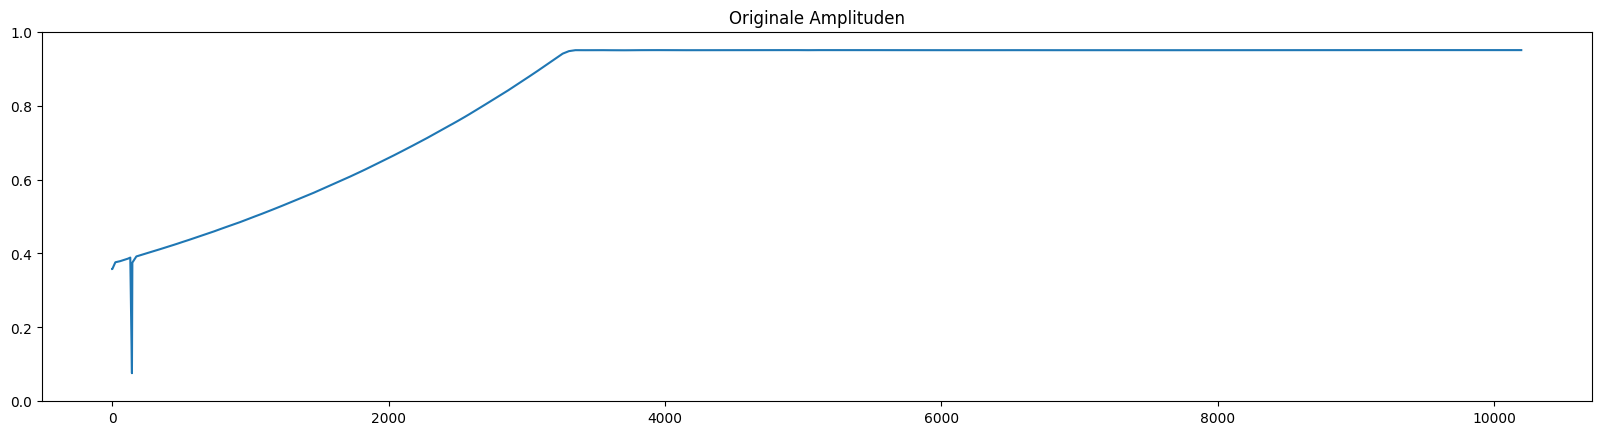

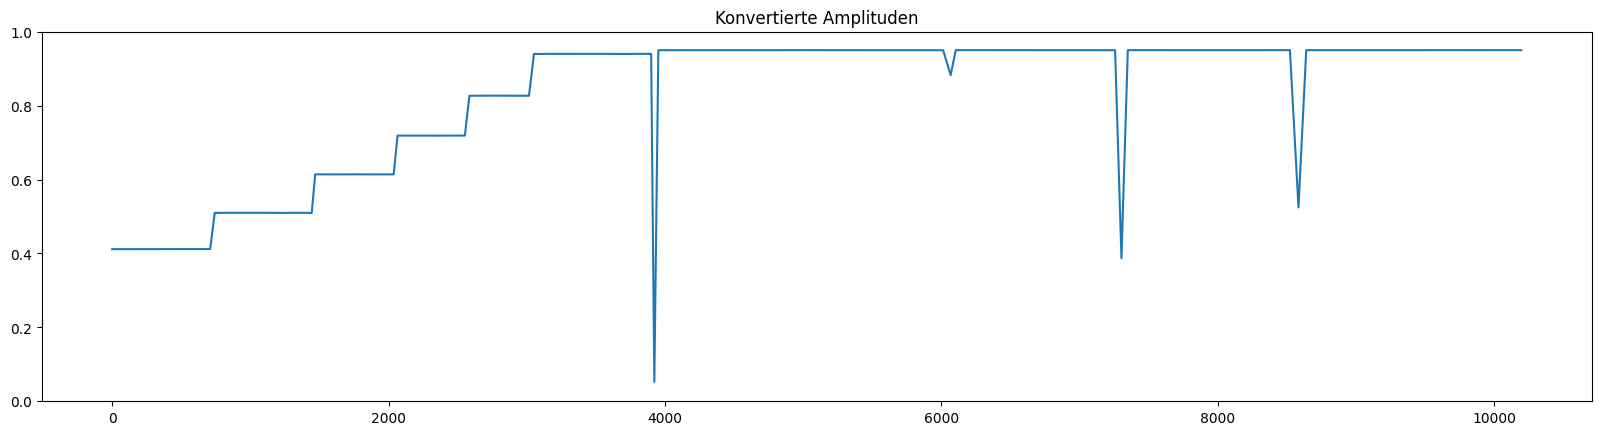

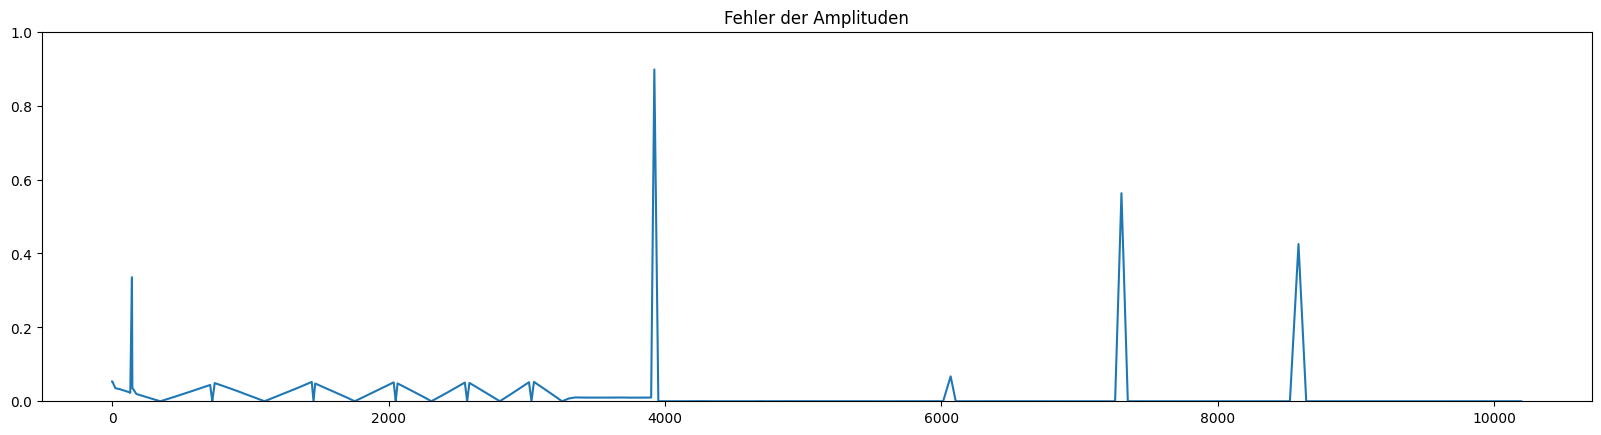

In [ ]:
original_amp=getAmplitudes(original, sr)
original_amp=interpolate(original_amp, len(original))

converted_amp=getAmplitudes(converted, sr)
converted_amp=interpolate(converted_amp, len(converted))



diff_amp = abs(original_amp-converted_amp)

meanDistance = numpy.mean(diff_amp)
print("Durchschnittliche Abweichung:", meanDistance * 100, "%")

plt.figure().set_figwidth(20)
plt.title("Originale Amplituden")
plt.ylim([0,1])
plt.plot(original_amp)
plt.figure().set_figwidth(20)
plt.title("Konvertierte Amplituden")
plt.ylim([0,1])
plt.plot(converted_amp)
plt.figure().set_figwidth(20)
plt.title("Fehler der Amplituden")
plt.ylim([0,1])
plt.plot(diff_amp)

## Frequenzdichte vergleich

126.15835182430635
122.52223792487536


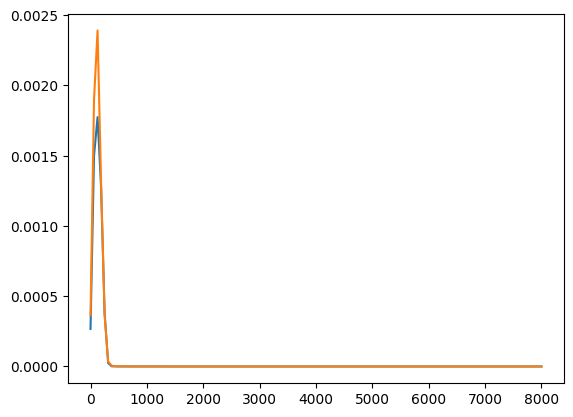

In [ ]:
f_org, psd_org = scipy.signal.welch(original, sr)

f_conv, psd_conv = scipy.signal.welch(converted, sr)
plt.plot(f_org, psd_org)
plt.plot(f_conv, psd_conv)

meanWelch_org = sum(numpy.multiply(f_org, psd_org)) / sum(psd_org)
print(meanWelch_org)
meanWelch_conv = sum(numpy.multiply(f_conv, psd_conv)) / sum(psd_conv)
print(meanWelch_conv)

## Komplexität

In [ ]:
from scipy.stats import entropy

variance_sinusoidal = numpy.var(original)
variance_noisy = numpy.var(converted)

print("Varianz der Sinuswelle:", variance_sinusoidal)
print("Varianz des verrauschten Signals:", variance_noisy)

Varianz der Sinuswelle: 0.36821187
Varianz des verrauschten Signals: 0.37067273
